In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data = df.iloc[:,:-1]
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [38]:
data_pca.head()

,0,1,fetal_health,Fetal health
0,-0.263977,-2.568375,2,Suspect
1,1.954458,2.230317,1,Normal
2,1.971485,1.968333,1,Normal
3,2.222056,2.134027,1,Normal
4,1.785438,2.190154,1,Normal


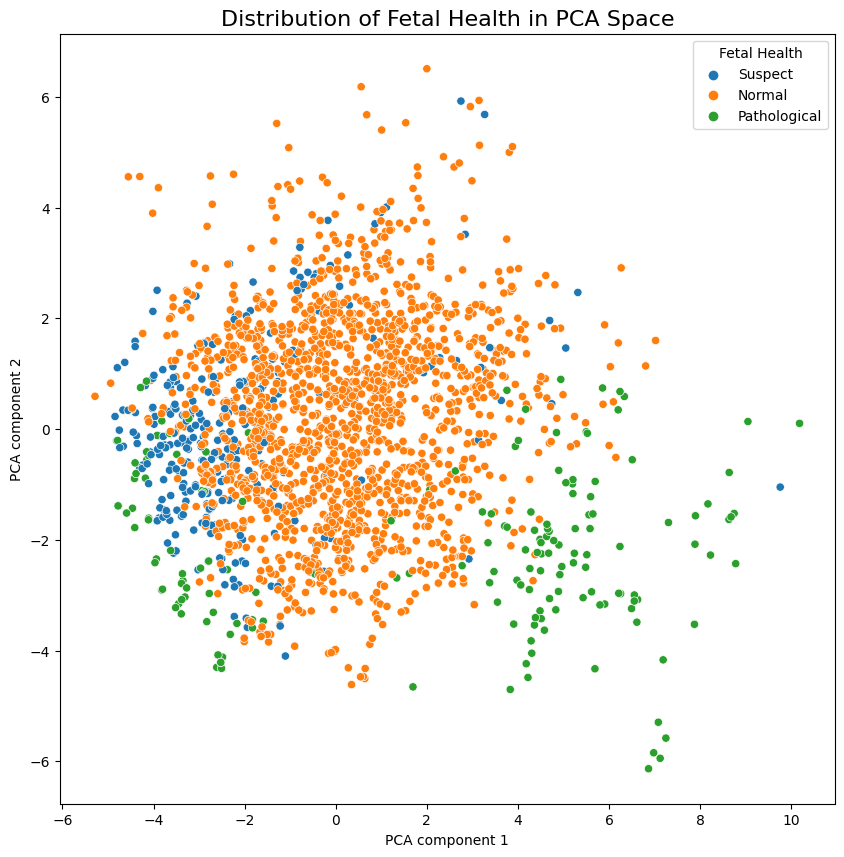

In [6]:
pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))
data_pca['fetal_health'] = df['fetal_health'].astype(int)
health_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
data_pca['Fetal health'] = data_pca['fetal_health'].apply(lambda x: health_mapping[x])

plt.figure(figsize=(10,10))
scatter = sns.scatterplot(x=data_pca[0], y= data_pca[1], hue= data_pca['Fetal health'])
scatter.legend(title='Fetal Health')
plt.title('Distribution of Fetal Health in PCA Space', fontsize= 16)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.show()

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 639)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# optimize Random Forest Model using Optuna

def objective(trial):
    # Internal division of train test sets
    X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # define parameter space
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'random_state': 639,
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 150, 200, 500, 700, 900]),
        'max_features': trial.suggest_categorical('max_features', [None , 'sqrt', 'log2'])
    }

    # initialize the random forest model
    rf_model_opt = RandomForestClassifier(**params)

    # train the model
    rf_model_opt.fit(X_train_opt, y_train_opt)

    # predict
    y_pred_opt = rf_model_opt.predict(X_valid_opt)

    # compute metric to optimize
    accuracy = accuracy_score(y_valid_opt, y_pred_opt)

    return accuracy

# Create optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtain best parameters
best_params_rf = study.best_params
print("Mejores parámetros encontrados:", best_params_rf)

# Train a new model with the best params
rf_model_final = RandomForestClassifier(**best_params_rf)
rf_model_final.fit(X_train, y_train)


[I 2024-01-23 14:28:15,392] A new study created in memory with name: no-name-5426cd24-898e-4bd9-9ffe-143971cf5bc3
[I 2024-01-23 14:28:16,301] Trial 0 finished with value: 0.9529411764705882 and parameters: {'criterion': 'log_loss', 'max_depth': 15, 'class_weight': None, 'n_estimators': 100, 'max_features': None}. Best is trial 0 with value: 0.9529411764705882.
[I 2024-01-23 14:28:16,939] Trial 1 finished with value: 0.9441176470588235 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'class_weight': 'balanced', 'n_estimators': 150, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9529411764705882.
[I 2024-01-23 14:28:18,790] Trial 2 finished with value: 0.9558823529411765 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'class_weight': None, 'n_estimators': 200, 'max_features': None}. Best is trial 2 with value: 0.9558823529411765.
[I 2024-01-23 14:28:21,694] Trial 3 finished with value: 0.9529411764705882 and parameters: {'criterion': 'log_loss', 'max_depth': 17

Mejores parámetros encontrados: {'criterion': 'log_loss', 'max_depth': 15, 'class_weight': 'balanced', 'n_estimators': 700, 'max_features': None}


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=15, max_features=None, n_estimators=700)

In [22]:
(y_pred_proba < 0.5).astype(np.int8)

array([[0, 1, 1],
       [0, 1, 1],
       [1, 0, 1],
       ...,
       [0, 1, 1],
       [0, 1, 1],
       [1, 0, 1]], dtype=int8)

In [35]:
from sklearn.metrics import f1_score
# predict target of the test set
y_pred = rf_model_final.predict(X_test)
y_pred_proba = rf_model_final.predict_proba(X_test)

# obtain accuracy and auc of the model
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class= 'ovo')
# f1 = f1_score(y_test,(y_pred_proba < 0.5).astype(np.int8),average='macro')
# obtain the confussion matrix
c_matrix = confusion_matrix(y_test, y_pred)

print(f'Random Forest accuracy: {acc}')
print(f'Random Forest AUC: {auc}')
# print(f"Random Forest F1: {f1}")

Random Forest accuracy: 0.9389671361502347
Random Forest AUC: 0.9887057292857252


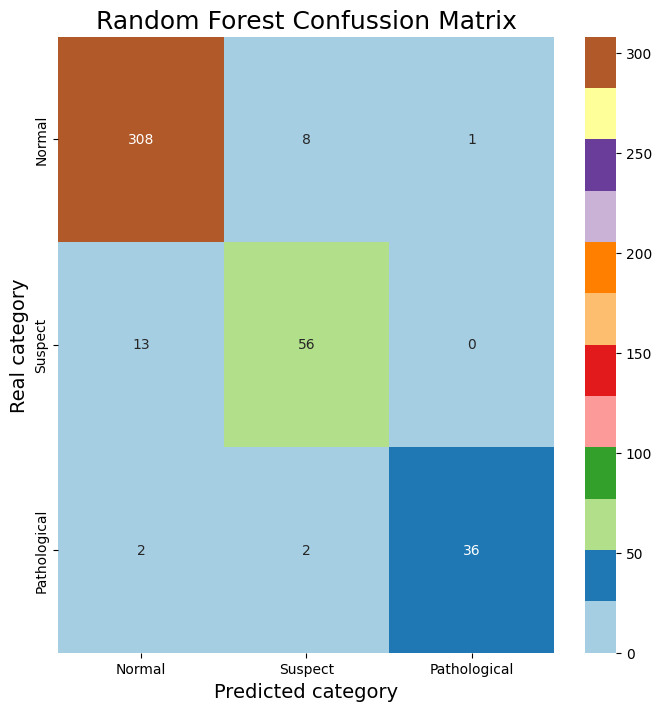

In [12]:
# graphical view of the confussion matrix
plt.figure(figsize=(8,8))

heatmap = sns.heatmap(c_matrix, cmap='Paired', annot=True, fmt='d')

heatmap.set_xticklabels(['Normal', 'Suspect', 'Pathological'])
heatmap.set_yticklabels(['Normal', 'Suspect', 'Pathological'])

heatmap.set_xlabel('Predicted category', fontsize=14)
heatmap.set_ylabel('Real category', fontsize=14)

plt.title('Random Forest Confussion Matrix', fontsize= 18)

plt.show()

In [15]:
# prepare the target sets for XGB
y_train_xgb, y_test_xgb = y_train - 1, y_test - 1

In [17]:
# optimize XGBoost hyperparameters using optuna
def objective(trial):
    params = {
        "objective": "reg:squarederror",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train_xgb, verbose=False)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_xgb, predictions)
    return accuracy

In [18]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-01-23 14:39:32,993] A new study created in memory with name: no-name-ff4953cd-4104-42f9-a183-ca6ef349279a
[I 2024-01-23 14:39:33,819] Trial 0 finished with value: 0.9225352112676056 and parameters: {'learning_rate': 0.01975339726270332, 'max_depth': 1, 'subsample': 0.8116695465186015, 'colsample_bytree': 0.9703392683171651, 'min_child_weight': 5}. Best is trial 0 with value: 0.9225352112676056.
[I 2024-01-23 14:39:35,103] Trial 1 finished with value: 0.9553990610328639 and parameters: {'learning_rate': 0.0193074100152283, 'max_depth': 3, 'subsample': 0.9695569760471747, 'colsample_bytree': 0.5233048253206757, 'min_child_weight': 1}. Best is trial 1 with value: 0.9553990610328639.
[I 2024-01-23 14:39:37,313] Trial 2 finished with value: 0.9107981220657277 and parameters: {'learning_rate': 0.0035302744095305014, 'max_depth': 9, 'subsample': 0.8245497936017111, 'colsample_bytree': 0.20314812388428088, 'min_child_weight': 9}. Best is trial 1 with value: 0.9553990610328639.
[I 2024-

In [26]:
# Best accuracy for XGB
print('Best hyperparameters:', study.best_params)
print('Best Accuracy:', study.best_value)

Best hyperparameters: {'learning_rate': 0.009575481407002605, 'max_depth': 6, 'subsample': 0.939848576302614, 'colsample_bytree': 0.8877865014043199, 'min_child_weight': 1}
Best Accuracy: 0.9624413145539906


In [27]:
best_params_xgb = study.best_params
final_model_xgb = xgb.XGBClassifier(**best_params_xgb)

In [28]:
# fiting the best XGB model with the training data
final_model_xgb.fit(X_train, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8877865014043199, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.009575481407002605,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
# predicting target of test set and computing metrics
y_pred_xgb = final_model_xgb.predict(X_test)
y_pred_proba_xgb = final_model_xgb.predict_proba(X_test)

acc = accuracy_score(y_test_xgb, y_pred_xgb)
auc = roc_auc_score(y_test_xgb, y_pred_proba_xgb, multi_class= 'ovo')

c_matrix = confusion_matrix(y_test_xgb, y_pred_xgb)

print(f'XGBoost accuracy: {acc}')
print(f'XGBoost AUC: {auc}')

XGBoost accuracy: 0.9413145539906104
XGBoost AUC: 0.984323519102699


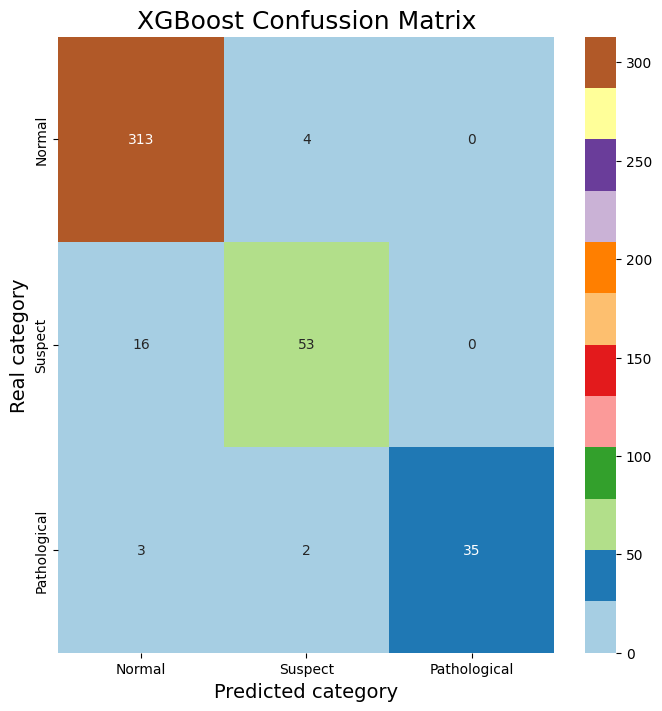

In [30]:
plt.figure(figsize=(8,8))

heatmap = sns.heatmap(c_matrix, cmap='Paired', annot=True, fmt='d')

heatmap.set_xticklabels(['Normal', 'Suspect', 'Pathological'])
heatmap.set_yticklabels(['Normal', 'Suspect', 'Pathological'])

heatmap.set_xlabel('Predicted category', fontsize=14)
heatmap.set_ylabel('Real category', fontsize=14)

plt.title('XGBoost Confussion Matrix', fontsize= 18)

plt.show()

In [31]:
def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostClassifier(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [32]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-01-23 14:46:09,291] A new study created in memory with name: no-name-ebb05ade-84a3-475f-aad5-87f50296b678
[I 2024-01-23 14:46:15,259] Trial 0 finished with value: 0.9413145539906104 and parameters: {'learning_rate': 0.008699392025512214, 'depth': 7, 'colsample_bylevel': 0.635109281453457, 'min_data_in_leaf': 96}. Best is trial 0 with value: 0.9413145539906104.
[I 2024-01-23 14:46:18,977] Trial 1 finished with value: 0.9436619718309859 and parameters: {'learning_rate': 0.01706832303425639, 'depth': 6, 'colsample_bylevel': 0.835476715763968, 'min_data_in_leaf': 32}. Best is trial 1 with value: 0.9436619718309859.
[I 2024-01-23 14:46:20,347] Trial 2 finished with value: 0.9413145539906104 and parameters: {'learning_rate': 0.05085641719086723, 'depth': 3, 'colsample_bylevel': 0.686574656373986, 'min_data_in_leaf': 47}. Best is trial 1 with value: 0.9436619718309859.
[I 2024-01-23 14:46:39,945] Trial 3 finished with value: 0.9413145539906104 and parameters: {'learning_rate': 0.00636

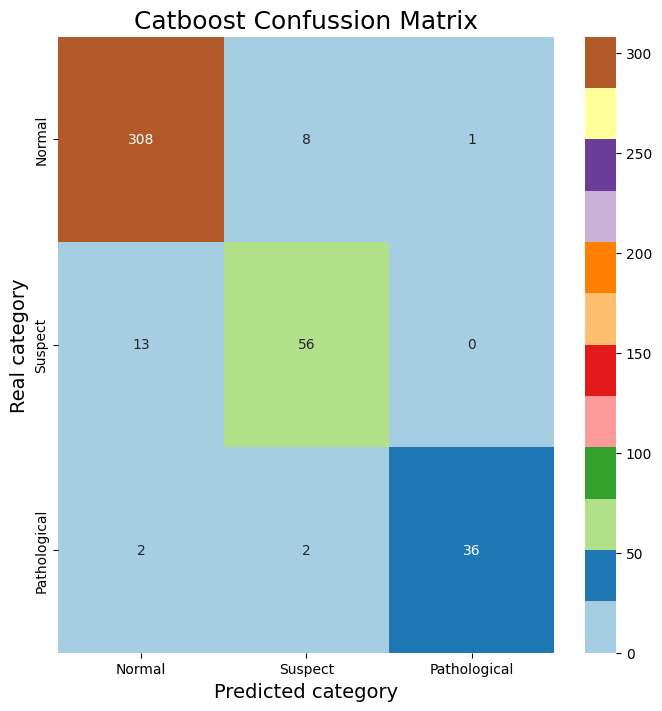

In [36]:
plt.figure(figsize=(8,8))

heatmap = sns.heatmap(c_matrix, cmap='Paired', annot=True, fmt='d')

heatmap.set_xticklabels(['Normal', 'Suspect', 'Pathological'])
heatmap.set_yticklabels(['Normal', 'Suspect', 'Pathological'])

heatmap.set_xlabel('Predicted category', fontsize=14)
heatmap.set_ylabel('Real category', fontsize=14)

plt.title('Catboost Confussion Matrix', fontsize= 18)

plt.show()

In [33]:
best_params_cb = study.best_params
final_model_cb = cb.CatBoostClassifier(**best_params_cb)
final_model_cb.fit(X_train, y_train)

y_pred_cb = final_model_cb.predict(X_test)
y_pred_proba_cb = final_model_cb.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred_cb)
auc = roc_auc_score(y_test, y_pred_proba_cb, multi_class= 'ovo')

c_matrix = confusion_matrix(y_test, y_pred_cb)

print(f'Catboost accuracy: {acc}')
print(f'Catboost AUC: {auc}')

0:	learn: 1.0476603	total: 24.4ms	remaining: 24.4s
1:	learn: 1.0036416	total: 53.1ms	remaining: 26.5s
2:	learn: 0.9588497	total: 81.4ms	remaining: 27s
3:	learn: 0.9214221	total: 109ms	remaining: 27.1s
4:	learn: 0.8872440	total: 133ms	remaining: 26.5s
5:	learn: 0.8523513	total: 158ms	remaining: 26.2s
6:	learn: 0.8186040	total: 183ms	remaining: 25.9s
7:	learn: 0.7874685	total: 207ms	remaining: 25.7s
8:	learn: 0.7594370	total: 234ms	remaining: 25.7s
9:	learn: 0.7346470	total: 262ms	remaining: 25.9s
10:	learn: 0.7103968	total: 287ms	remaining: 25.8s
11:	learn: 0.6895277	total: 313ms	remaining: 25.8s
12:	learn: 0.6655861	total: 339ms	remaining: 25.8s
13:	learn: 0.6438872	total: 363ms	remaining: 25.6s
14:	learn: 0.6237997	total: 385ms	remaining: 25.3s
15:	learn: 0.6056164	total: 411ms	remaining: 25.3s
16:	learn: 0.5877968	total: 443ms	remaining: 25.6s
17:	learn: 0.5703948	total: 482ms	remaining: 26.3s
18:	learn: 0.5541209	total: 511ms	remaining: 26.4s
19:	learn: 0.5381898	total: 537ms	remain

Summary:  
Best Model: Catboost  
Best Hyperparameters: {'learning_rate': 0.09457225324993328, 'depth': 10, 'colsample_bylevel': 0.1818316948629231, 'min_data_in_leaf': 80}  
Catboost accuracy: 0.9624413145539906  
Catboost AUC: 0.9872535012724972